# Overview
Data validation is the process of ensuring that data is accurate, complete, and consistent. It involves verifying that data meets certain criteria, such as data type, value range, and formatting rules. Data quality control, on the other hand, is a broader process that includes all activities related to maintaining and improving the quality of data. It involves identifying and addressing data quality issues, implementing processes to improve data quality, and ensuring that data is fit for purpose.

Data validation and quality control are important in data wrangling, which is the process of preparing data for analysis. During data wrangling, data may be sourced from various systems, and it may need to be cleaned, transformed, or combined with other data. This process can introduce errors or inconsistencies, which can negatively impact the accuracy and reliability of subsequent analyses.

Data validation and quality control are important for several reasons:

* Ensuring Accurate Analysis: Data that is not accurate, complete, or consistent can lead to incorrect or misleading analysis results. By validating and controlling the quality of data, we can ensure that the data is accurate and reliable, leading to more accurate and meaningful analysis.
* Minimizing Errors and Inconsistencies: Errors and inconsistencies in data can be time-consuming to identify and correct, and they can lead to delays in analysis or even incorrect conclusions. By validating and controlling the quality of data, we can minimize errors and inconsistencies and prevent the need for corrective measures later in the analysis process.
* Reducing Risk: Incorrect or incomplete data can lead to inaccurate analysis results, which can have serious consequences for business decisions. By validating and controlling the quality of data, we can reduce the risk of making decisions based on inaccurate data.

In this module, we will cover the following topics:

I. Data profiling: Examining and analyzing data to identify relationships and quality issues.

II. Missing value analysis: Identifying and handling missing data in a dataset.

III. Outlier detection: Identifying data points that deviate significantly from the majority of the data.

IV. Checking data accuracy: Verifying the correctness and consistency of data.

## Learning Objectives
In this module, the learners will:

* Understand the importance of data validation and quality control
* Use data profiling techniques to identify data quality issues
* Evaluate the different methods for analyzing missing values
* Evaluate the effectiveness of outlier detection techniques
* Discuss various approaches to measure data accuracy
Let's get started!

## Dataset
Titanic dataset: This is a well-known and widely used dataset in the field of data analysis and machine learning. This dataset contains information about the passengers on the Titanic ship, including their demographic information, ticket information, and survival status. In this exercise, we're using the Titanic dataset to demonstrate data validation and quality control techniques.

Here's a description of the columns in the dataset:

* PassengerId: This column is a unique identifier assigned to each passenger.
* Age: This column specifies the age of the passenger.
* Name: This column specifies the name of the passenger.
* Sex: This column specifies the gender of the passenger (Male or Female).
* Survived: This column specifies whether the passenger survived the Titanic disaster or not. The values in this column can either be 0 (did not survive) or 1 (survived).
* Pclass (Passenger Class): This column specifies the class of the passenger (1st, 2nd, or 3rd class).
* SibSp (Siblings/Spouses Aboard): This column specifies the number of siblings or spouses the passenger was traveling with.
* Parch (Parents/Children Aboard): This column specifies the number of parents or children the passenger was traveling with.
* Ticket: This column specifies the ticket number assigned to the passenger.
* Fare: This column specifies the fare paid by the passenger for their ticket.
* Cabin: This column specifies the cabin number assigned to the passenger.
* Embarked: This column specifies the port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).

# Data Profiling
## What is data profiling?
Data profiling is the process of examining and analyzing data to identify relationships and quality issues. It involves assessing the completeness, accuracy, consistency, and uniqueness of data.

## Why is it important?
Data profiling can save time and effort in data validation. By identifying data quality issues early in the process, data validators can focus their attention on correcting these issues and avoid spending time validating data that is of low quality or has obvious issues. Data profiling enables effective data analysis by ensuring that the data is accurate and reliable.

Data profiling supports data governance by providing an understanding of the data that is being managed. By profiling the data, we can understand the structure of the data, the data quality issues, and the relationships between data elements. This information can help in the development of data governance policies and procedures.

## Data type analysis
Data type analysis is a key component of data profiling. It involves examining the data to identify the data types of different fields or columns, such as numeric, categorical, date/time, or text. This analysis can help you understand the nature of the data and identify potential issues or data quality problems.

Suppose you want to perform data type analysis on the Titanic dataset to identify the data types of the different fields.

In [23]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Display the data types of the columns
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


From this output, we can see that the 'PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', and 'Fare' columns are numeric, while the 'Name', 'Sex', 'Ticket', 'Cabin', and 'Embarked' columns are text or categorical.

### NOTE
In addition to identifying the data types, it's also important to check if the data types are correct. For example, if a column should be numeric but is imported as text, it could cause issues in subsequent analyses. Data type analysis is a crucial first step in identifying and addressing these issues.

To perform data type analysis on the Titanic dataset, you can also use the 'info()' method of a Pandas dataframe.

In [24]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Display information about the data types of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


The output of this code snippet will display the data types of each column in the Titanic dataset, as well as the number of non-null values in each column. This can help you identify any issues with the data types of the columns in the dataset, such as missing values or data types that do not match the intended format.

## Value frequency analysis
This is a technique used in data profiling to identify the frequency of values in a particular column or field of a dataset. It involves examining the frequency of each unique value in the column and identifying any outliers, or potential data quality issues.

For example, we can use value frequency analysis to identify the number of passengers in each ticket class, the number of male and female passengers, or the number of passengers who survived or did not survive. Here is the code for performing value frequency analysis on the 'Sex' column:

In [25]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Display the frequency of values in the "Sex" column
print(df["Sex"].value_counts())

male      577
female    314
Name: Sex, dtype: int64


The above code displays the frequency of values in the 'Sex' column. We can see that there were 577 males on board the Titanic and 314 females.

We can also perform value frequency analysis on other columns in the Titanic dataset. For example, we can use the following code to display the frequency of values in the 'Pclass' column:

In [26]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Display the frequency of values in the "Pclass" column
print(df["Pclass"].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In the code above, we can see that the majority of passengers on the Titanic were in third class (491 passengers), followed by first class (216 passengers) and second class (184 passengers).

## Value distribution analysis
This is a data profiling technique used to examine the distribution of values within a given column or field in a dataset. This technique helps to identify the spread of data, the presence of outliers or missing values, and any potential data quality issues.

In the context of the Titanic dataset, value distribution analysis can help data validators understand the distribution of values for various attributes, such as the age, fare, and number of siblings/spouses or parents/children aboard the ship. For example, it can help to identify if there are any extreme values or outliers, which could impact the accuracy of subsequent analyses.

Here is the code for performing value distribution analysis on the 'Age' column:

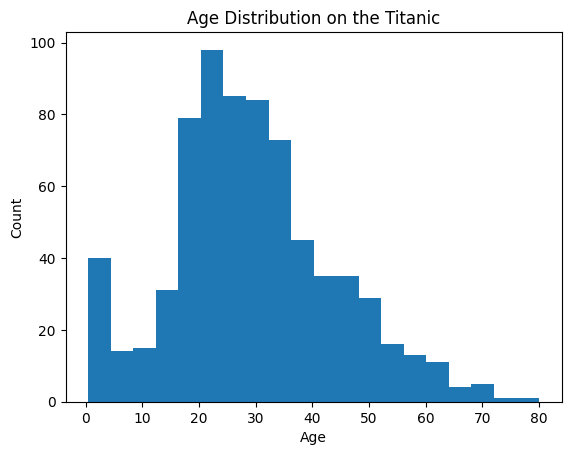

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Plot the distribution of values in the "Age" column
plt.hist(df["Age"].dropna(), bins=20)
plt.title("Age Distribution on the Titanic")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The code above plots the distribution of values in the 'Age' column using a histogram. The 'dropna()' function is used to remove any missing values from the column. The 'bins' parameter specifies the number of bins to use in the histogram.

From this histogram, we can see that the age distribution on the Titanic is skewed to the right, with a peak around 20-30 years old. We can also see that there are some missing values in the 'Age' column, as indicated by the gap in the histogram.

We can perform value distribution analysis on other columns in the Titanic dataset as well. For example, we can use the following code to plot the distribution of values in the 'Fare' column:

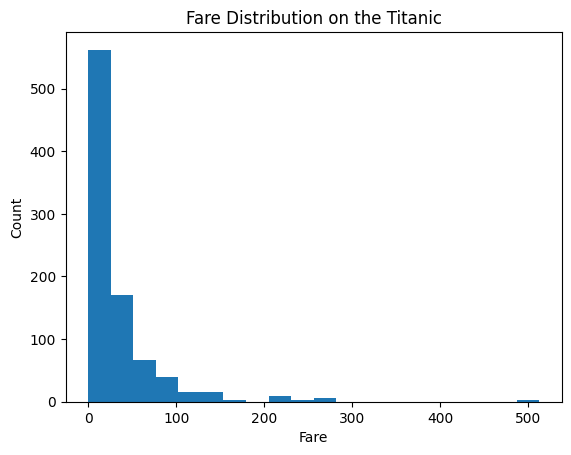

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Plot the distribution of values in the "Fare" column
plt.hist(df["Fare"], bins=20)
plt.title("Fare Distribution on the Titanic")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

The output will display a histogram of the fare distribution on the Titanic. According to the histogram, the fare range of 1 to 25 has the highest count compared to all other fare ranges.

## Data uniqueness analysis
This is a data profiling technique used to identify unique values in a column or field in a dataset. This technique helps to ensure that there are no duplicate values or redundancy in the data, which can impact the accuracy of analyses and modeling.

In the context of the Titanic dataset, data uniqueness analysis can be used to identify the number of unique values for various attributes, such as the passenger ID, name, and ticket number. This analysis can help you to ensure that there are no duplicate entries for a particular passenger or ticket, which could result in inaccurate analyses.

Here is the code for performing data uniqueness analysis on the 'Name' column:

In [29]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Calculate the number of unique values in the "Name" column
unique_names = df["Name"].nunique()

# Print the number of unique names
print("Number of unique names: ", unique_names)



Number of unique names:  891


The code above calculates the number of unique values in the 'Name' column using the 'nunique()' function. The observation that the number of unique names in the 'Name' column of the dataset matches the number of rows in the original dataset, which is 891, implies that each row represents a distinct individual. This suggests that the dataset is free of duplicate values in the 'Name' column.

We can perform data uniqueness analysis on other columns in the Titanic dataset as well. For example, we can use the following code to calculate the number of unique values in the 'Ticket' column:

In [30]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Calculate the number of unique values in the "Ticket" column
unique_tickets = df["Ticket"].nunique()


# Print the number of unique tickets
print("Number of unique tickets: ", unique_tickets)



Number of unique tickets:  681


The output will display the number of unique tickets in the dataset.

## Statistical summary analysis
Statistical summary analysis is a technique used in data profiling to summarize the main characteristics of a dataset. This type of analysis provides valuable information about the data, including the central tendency (mean and median), variability (standard deviation), distribution (minimum, 25th percentile, 50th percentile, 75th percentile, and maximum), and shape of the data. By examining the statistical properties of the data, we can identify potential data quality issues, such as missing or erroneous values, outliers, and inconsistencies.

The following code demonstrates how to use Pandas to get a statistical summary of the 'Age' column in the Titanic dataset:

In [31]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Get a statistical summary of the "Age" column
age_summary = df["Age"].describe()

# Print the statistical summary
print(age_summary)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


This code uses the 'describe()' function in Pandas to get a statistical summary of the 'Age' column. The output will display the count, mean, standard deviation, minimum, and maximum values of the 'Age' column, which can provide insights into the age distribution of the passengers.

### CAVEAT
Statistical summary analysis in data validation can be limited by the quality and completeness of the data. If the data contains errors, inconsistencies, or missing values, the results of the analysis may be inaccurate or misleading. It's important to carefully validate and clean the data before conducting any statistical analysis to ensure that the results are reliable and meaningful.

## Data correlation analysis
This analysis is a type of data profiling that examines the relationship between different variables in a dataset. Specifically, it looks at the strength and direction of the correlation between pairs of variables, which can help identify potential patterns and trends in the data.

In the case of the Titanic dataset, we can perform a data correlation analysis between the 'Sex' and 'Survived' to see if there is any relationship between a passenger's sex and their likelihood of survival. This can help us gain insights into any potential gender biases that may have existed during the Titanic disaster.

To perform the analysis, we can start by creating a pivot table that shows the count of passengers who survived and who didn't survive for each sex:

In [32]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Group the data by 'Sex' and 'Survived'
grouped = df.groupby(['Sex', 'Survived'])

# Compute the correlation between 'Sex' and 'Survived'
corr = grouped.size().unstack().corr().iloc[0,1]

# Print the correlation coefficient
print(f"The correlation coefficient between Sex and Survived is {corr:.3f}")

The correlation coefficient between Sex and Survived is -1.000


In this code, we group the data by 'Sex' and 'Survived'. We then compute the correlation between the two fields using the 'size()' method to count the number of occurrences of each combination of values, the 'unstack()' method to reshape the data into a two-dimensional table, the 'corr()' method to compute the correlation matrix, and the 'iloc' indexer to extract the correlation coefficient between 'Sex' and 'Survived'.

This result indicates a strong negative correlation between the 'Sex' and 'Survived' fields, which means that female passengers were much more likely to survive than male passengers. We can also visualize this relationship using a bar chart:

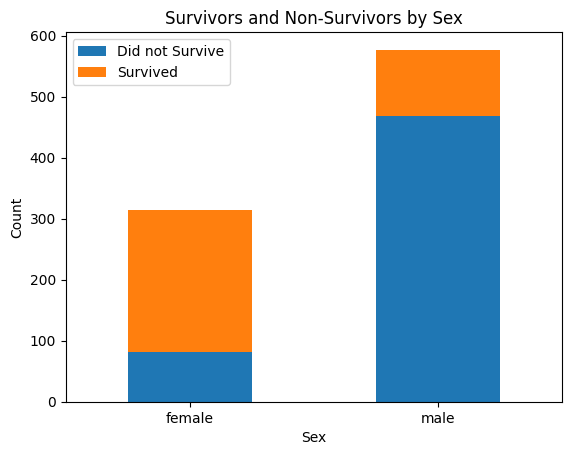

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Group the data by 'Sex' and 'Survived'
grouped = df.groupby(['Sex', 'Survived'])

# Compute the count of survivors and non-survivors by sex
counts = grouped.size().unstack()

# Plot the bar chart
counts.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Survivors and Non-Survivors by Sex')
plt.legend(['Did not Survive', 'Survived'])
plt.show()



This code will create a bar chart showing the count of survivors and non-survivors by sex. The bars are stacked to show the total count for each sex, and the legend shows which color corresponds to survivors and non-survivors.

# Missing Values Analysis
## What is missing values analysis?
Missing value analysis is a process of identifying and handling missing data in a dataset. Missing data refers to any observation or value that is absent, unknown, or incomplete in a dataset. Missing data can be a result of various reasons such as human errors during data collection, data processing errors, or even intentional omissions.

## Why is it important?
Missing value analysis is an important step in data validation because missing data can cause problems in data analysis and may lead to incorrect conclusions. For example, omitting incomplete cases may result in biased estimates and lost statistical power. Moreover, missing data can also affect the accuracy of data mining models.

As a result, the objective of missing value analysis is to determine the extent of missing data and determine the optimal approach to handle the missing values. The analysis includes techniques for identifying missing data, imputing missing values, and validating the accuracy of the imputed data. By conducting a missing value analysis, we can ensure that the data is complete, accurate, and unbiased, which is essential for proper data analysis and modeling.



## Identify missing values
Identifying missing values is an important step in data profiling to ensure the quality and reliability of the dataset. One way to do this is by using the 'isna()' function in Pandas, which allows you to check for missing values in a dataset and returns a boolean value of True for each missing value and False for each non-missing value.

For the Titanic dataset, we can use the 'isna()' function to identify missing values in the 'Age' and 'Survived' columns. This will help us to determine if any data is missing and to decide on a strategy for handling the missing values.

Here's an example of how to use the 'isna()' function on the Titanic dataset to identify missing values in the 'Age' and 'Survived' columns:

In [34]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Check for missing values in the 'Age' column
age_missing = df['Age'].isna().sum()
print(f"The 'Age' column has {age_missing} missing values.")

# Check for missing values in the 'Survived' column
survived_missing = df['Survived'].isna().sum()
print(f"The 'Survived' column has {survived_missing} missing values.")



The 'Age' column has 177 missing values.
The 'Survived' column has 0 missing values.


In this example, we check for missing values in the 'Age' column by calling the 'isna()' method on the 'Age' column of the Titanic DataFrame, which returns a Boolean series indicating whether each element in the column is missing or not. The 'sum()' method is then called on this Boolean series to count the number of missing values in the column. Next, we used the same method to identify any missing values in the 'Survived' column.


We can use the following code to get the number of missing values in each column:

In [35]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Check for missing values in the 'Age' column
age_missing = df['Age'].isna().sum()
print(f"The 'Age' column has {age_missing} missing values.")

print(df.isna().sum())



The 'Age' column has 177 missing values.
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


This will return a Pandas Series with the number of missing values in each column of the Titanic dataset.

Another useful method for identifying missing values in a Pandas DataFrame is the 'isnull()' method. This method returns a DataFrame of the same shape as the input DataFrame, but with boolean values indicating whether each element is missing or not. Similarly, the 'notnull()' method returns a DataFrame with boolean values indicating whether each element is not missing.

We can also use the following code to get the number of missing values in each column using the 'isnull()' method:

In [36]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Check for missing values in the 'Age' column
age_missing = df['Age'].isna().sum()
print(f"The 'Age' column has {age_missing} missing values.")

print(df.isnull().sum())

The 'Age' column has 177 missing values.
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### NOTE
In Pandas, the 'isna()' function is an alias for the 'isnull()' function, and both can be used interchangeably.

By identifying missing values, we can decide on a strategy for handling them, such as imputation or removing the rows with missing values. This helps to ensure the quality and reliability of the dataset for analysis.

### NOTE
Upon identifying missing values in the dataset, it's important to note that we do not cover handling missing values in this module. However, handling the missing values section in the Data Cleaning Using Python module is specifically designed to tackle the issue of missing data using a range of techniques, including deletion and imputation.

# Outlier Detection
## What is outlier detection?
Outlier detection is a process of identifying data points that deviate significantly from the majority of the data in a dataset. These points, also known as outliers, can distort the analysis and affect the overall results, and therefore it is essential to detect and handle them appropriately in data wrangling.

## Why is it important?
Outliers can occur for a variety of reasons, such as measurement errors, data entry errors, or rare events, and can have a significant impact on statistical analysis, machine learning models, and data visualization. Outliers can lead to biased estimates of central tendencies, variance, correlation, and regression coefficients, which can affect the overall quality and reliability of the analysis.

Outlier detection in data wrangling involves identifying such points through various statistical and computational methods and then handling them appropriately by either removing them or treating them differently in the analysis. Outlier detection helps to improve the accuracy and validity of the analysis and enables better decision-making based on more reliable insights from the data.

Overall, outlier detection is an important step in data wrangling as it helps to ensure that the analysis is based on accurate and meaningful data, free from the distortions caused by outliers.


## Z-score
The z-score method is a statistical technique used for detecting outliers in a dataset. It involves computing the standard score, or z-score, of each data point relative to the mean and standard deviation of the data. A data point with a z-score beyond a certain threshold is considered an outlier.

In the context of the Titanic dataset, the z-score method can be used to identify outliers in a column such as age or fare, which may contain extreme values that deviate significantly from the rest of the data.

For example, suppose we want to identify outliers in the 'Age' column of the Titanic dataset. We can use the z-score method to calculate the z-score of each data point as follows:

In [37]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Calculate z-score of Age column
age_zscore = (df['Age'] - np.mean(df['Age'])) / np.std(df['Age'])
print(age_zscore)

0     -0.530377
1      0.571831
2     -0.254825
3      0.365167
4      0.365167
         ...   
886   -0.185937
887   -0.737041
888         NaN
889   -0.254825
890    0.158503
Name: Age, Length: 891, dtype: float64


In the code above, we calculate the z-score of the 'Age' column using the NumPy library, which involves subtracting the mean of the 'Age' column from each data point and dividing it by the standard deviation of the 'Age' column.

We can then set a threshold for the z-score to identify outliers. For example, suppose we choose a threshold of 3. Any data point with a z-score greater than 3 or less than -3 would be considered an outlier. We can use this threshold to filter out the outliers in the 'Age' column as follows:

In [38]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Calculate z-score of Age column
age_zscore = (df['Age'] - np.mean(df['Age'])) / np.std(df['Age'])

# Filter out outliers in age column
age_outliers = df[abs(age_zscore) > 3]
print(age_outliers)

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
630  male  80.0      0      0   27042  30.000   A23        S  
851  male  74.0      0      0  347060   7.775   NaN        S  


In the code above, we use the Pandas 'abs()' function to calculate the absolute value of the z-score and then use it to filter out the outliers in the 'Age' column by selecting only the data points with a z-score greater than 3 or less than -3.

## Interquartile range
Interquartile Range (IQR) method is a statistical technique used for detecting outliers in a dataset. It involves computing the difference between the upper and lower quartiles of the data and then using this range to identify outliers that lie beyond a certain threshold.

In the context of the Titanic dataset, the IQR method can be used to identify outliers in columns such as 'Age' or 'Fare', which may contain extreme values that deviate significantly from the rest of the data.

For example, suppose you want to identify outliers in the 'Fare' column of the Titanic dataset. We can use the IQR method to calculate the IQR of the data and then use this range to identify outliers that lie beyond a certain threshold.

In [39]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Calculate IQR of Fare column
q1 = np.percentile(df['Fare'], 25)
q3 = np.percentile(df['Fare'], 75)
iqr = q3 - q1

 # Set threshold for outliers
threshold = 1.5 * iqr

 # Filter out outliers in Fare column
fare_outliers = df[(df['Fare'] < q1 - threshold) | (df['Fare'] > q3 + threshold)]
print(fare_outliers.head())



    PassengerId  Survived  Pclass  \
1             2         1       1   
27           28         0       1   
31           32         1       1   
34           35         0       1   
52           53         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
31     Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                            Meyer, Mr. Edgar Joseph    male  28.0      1   
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   

    Parch    Ticket      Fare        Cabin Embarked  
1       0  PC 17599   71.2833          C85        C  
27      2     19950  263.0000  C23 C25 C27        S  
31      0  PC 17569  146.5208          B78        C  
34      0  PC 17604   82.1708          NaN        C  
52      0  PC 17572   76.7292         

In the code above, we calculate the IQR of the 'Fare' column using the NumPy library, which involves calculating the difference between the upper and lower quartiles of the data. The lower quartile (Q1) is the value below which 25% of the data falls, and the upper quartile (Q3) is the value below which 75% of the data falls.

We then set a threshold for the outliers using a multiplier of 1.5 times the IQR. Any data point that lies beyond this threshold is considered an outlier. We can use this threshold to filter out the outliers in the 'Fare' column by selecting only the data points with a fare value less than 'q1 - threshold' or greater than 'q3 + threshold'.

## Local outlier factor
Local Outlier Factor (LOF) is a popular algorithm for detecting outliers in datasets. LOF works by measuring the density of a point relative to its surrounding neighbors. A point with a much lower density than its neighbors is likely to be an outlier.

In the context of the Titanic dataset, LOF can be used to identify passengers who have unusual characteristics compared to others. For example, a passenger who paid a much higher fare than other passengers in the same class could be considered an outlier. Similarly, a passenger who was much younger or older than other passengers in the same class could also be considered an outlier.

To implement LOF on the Titanic dataset, we can use the scikit-learn library in Python. The following code demonstrates how to use LOF to identify outliers in the Titanic dataset:

In [40]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Select relevant features
X = df[['Pclass', 'Age', 'Fare']].dropna()

# Fit the LOF model
lof = LocalOutlierFactor(n_neighbors=20)
lof.fit(X)

# Get the outlier scores for each passenger
outlier_scores = lof.negative_outlier_factor_

# Identify the outliers
outlier_threshold = -2.5
outliers = [i for i, score in enumerate(outlier_scores) if score < outlier_threshold]

# Print the outliers
print(outliers)



[208, 218, 242, 302, 537, 587]


In this code, we select the relevant features ('Pclass', 'Age', and 'Fare'). By using the 'dropna()' method to remove rows with missing values in the 'Pclass', 'Age', and 'Fare' columns, the input data for the 'LocalOutlierFactor()' method does not contain any NaN or infinite values. We then fit the LOF model with a specified number of neighbors (n_neighbors=20). The specific value of 20 is chosen based on trial and error and can be adjusted as needed. A higher number of neighbors will result in a smoother estimate of local density but may also include more outliers.

The LOF model assigns a negative outlier factor to each point, with lower scores indicating greater deviation from the local density. We use a threshold of -2.5 to identify outliers and print the indices of the identified outliers. The specific value of -2.5 is chosen based on trial and error and can be adjusted as needed.

### NOTE
This is just one example of how LOF can be used in outlier detection on the Titanic dataset. Depending on the specific problem, different features and thresholds may be used to identify outliers.

## Median absolute deviation
MAD (Median Absolute Deviation) is a robust method for identifying outliers in a dataset. Unlike other methods that rely on the mean and standard deviation, MAD is based on the median and the absolute deviation from the median. An advantage of MAD is that it is less sensitive to extreme values in the dataset. This results in a more accurate identification of outliers, as the mean and standard deviation are less likely to be skewed.

In the context of the Titanic dataset, MAD can be used to identify passengers who have unusual characteristics compared to others. For example, a passenger who paid a much higher fare than other passengers in the same class could be considered an outlier. Similarly, a passenger who was much younger or older than other passengers in the same class could also be considered an outlier.

To implement MAD on the Titanic dataset, we can use the NumPy library in Python. The following code demonstrates how to use MAD to identify outliers in the Titanic dataset:

In [41]:
import numpy as np
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Select relevant features
X = df[['Pclass', 'Age', 'Fare']].dropna()

# Calculate the median and median absolute deviation for each feature
med = np.median(X, axis=0)
mad = np.median(np.abs(X - med), axis=0)

# Calculate the z-score for each point
z_score = np.abs((X - med) / mad)

# Identify the outliers
outlier_threshold = 3
outliers = np.where(z_score > outlier_threshold)[0]

# Print the outliers
print(outliers)



[  1   3   5  10  23  25  26  27  33  38  40  40  44  46  47  54  55  57
  59  63  67  71  73  74  75  79  85  91  93  95  98 109 111 122 123 125
 135 136 140 156 156 172 175 180 185 187 197 200 203 207 208 211 216 216
 217 221 221 225 234 235 240 241 243 243 244 246 247 248 255 256 261 262
 265 267 269 270 274 286 293 293 294 295 298 301 304 307 308 309 312 315
 331 347 348 351 351 357 364 366 373 374 383 385 386 387 388 393 393 395
 396 401 402 405 408 414 416 426 427 428 432 433 437 441 443 451 452 457
 460 463 465 465 468 473 480 481 484 490 494 495 496 498 507 509 510 512
 517 520 520 521 526 530 531 536 537 538 540 541 542 546 547 550 553 555
 563 564 565 569 576 581 587 588 589 592 592 595 601 602 606 609 611 616
 620 622 629 639 640 646 656 662 662 664 667 669 679 684 693 696 703 703]


In this code, we select the relevant features ('Pclass', 'Age', and 'Fare') and drop the missing values rows. We then calculate the median and median absolute deviation (MAD) for each feature.

We use the MAD to calculate the z-score for each point, which is a measure of how many median absolute deviations away from the median each point is. We use a threshold of 3 to identify outliers and print the indices of the identified outliers. The choice of 3 as the threshold is somewhat arbitrary, but it is often used because it corresponds to a probability of approximately 0.003, or 0.3%. This means that if the data is normally distributed, we would expect to see only about 0.3% of the data fall outside of the range of +/- 3 standard deviations.

Increasing the outlier threshold in the z-score method would reduce the number of data points classified as outliers. However, this could lead to the loss of important information or patterns in the data, especially if there are extreme values that are still informative for the analysis. Therefore, it's essential to choose a threshold that suits the dataset and analysis goals and consider the data's distribution and variability when identifying outliers.

### INFO
It is worth mentioning that the choice of features used to identify outliers can depend on the specific problem and dataset at hand. Other combinations of features may be more appropriate in different scenarios.

## Box plot
Box plots are a graphical method of outlier detection that can be used to visualize the distribution of a dataset and identify potential outliers. In a box plot, the median, upper and lower quartiles, and extreme values are represented using a box and whisker plot.

In the context of the Titanic dataset, box plots can be used to identify potential outliers in columns such as 'Age' or 'Fare' by plotting the distribution of the data and visually inspecting for values that lie outside of the expected range.

For example, suppose we want to create a box plot of the 'Fare' column in the Titanic dataset to identify potential outliers. We can use the following code:

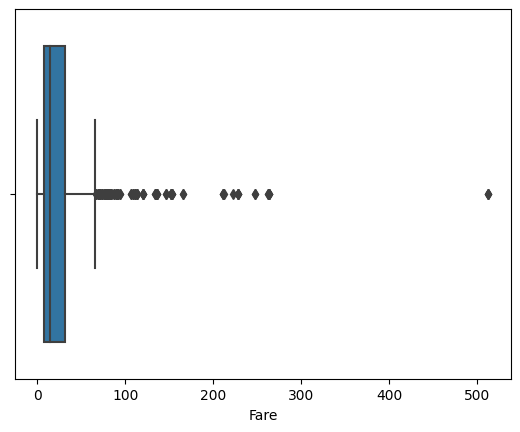

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Create box plot of Fare column
sns.boxplot(x=df['Fare'])

# Display the plot
plt.show()

In the code above, we create a box plot of the 'Fare' column using the Seaborn library, which creates a box plot of the distribution of the data.

The box plot shows the median (the horizontal line inside the box), the upper and lower quartiles (the top and bottom edges of the box), and any extreme values (represented by the whiskers extending from the top and bottom edges of the box). Points that lie outside of the whiskers are considered potential outliers.

# Checking Data Accuracy
## What is checking data accuracy?
Checking data accuracy is the process of verifying the correctness and consistency of data within a dataset. It is an essential component of data validation and quality control, as it helps to ensure that the data is reliable and can be used for analysis or decision-making purposes. Checking data accuracy involves examining the data for errors, inconsistencies, and discrepancies, and correcting or removing them where necessary.

## Why is it important?
It is important in data validation and quality control because inaccurate or inconsistent data can lead to incorrect conclusions and decisions. For example, if a dataset contains errors or inconsistencies, it may lead to inaccurate predictions or analysis results. By performing data accuracy checks, you can ensure that data is reliable, consistent, and accurate, which can improve decision-making, reduce errors and costs, and enhance overall operational efficiency.



## Data range validation
Data range validation is a process of verifying whether the values in a dataset fall within an expected range or not. This is an important aspect of checking data accuracy as it helps ensure that the data is within acceptable limits and that there are no outliers or data entry errors.

For example, in the Titanic dataset, we may want to check whether the age values fall within a reasonable range, such as between 0 and 100 years. We can also check if the fare values are within a realistic range, such as between 0 and 1000 dollars.

Here is an example code that checks the age, sex, and cabin values in the Titanic dataset:

In [43]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# Define data ranges
age_range = (0, 100)
sex_values = ['male', 'female']
cabin_format = r'[A-Z]\d+'

# Check for invalid data
invalid_age = (~df['Age'].between(*age_range)).sum()
invalid_sex = (~df['Sex'].isin(sex_values)).sum()
invalid_cabin = (~df['Cabin'].str.match(cabin_format, na=False)).sum()

# Print results
if invalid_sex == 0:
    print("No invalid values are found in the 'Sex' column.")
else:
    print(f"Invalid sex values: {invalid_sex}")
print(f"Invalid age values: {invalid_age}")
print(f"Invalid cabin values: {invalid_cabin}")


No invalid values are found in the 'Sex' column.
Invalid age values: 177
Invalid cabin values: 695


The code above checks for invalid data in three columns of the Titanic dataset. For the 'Age' column, it checks if each value falls within the acceptable range using the 'between()' method. The 'isin()' method is used for the 'Sex' column to check if each value is one of the acceptable values. For the 'Cabin' column, it checks if each value matches the expected format using the 'str.match()' method. In each case, the '~' operator is used to invert the resulting boolean Series to identify the invalid values, and the 'sum()' method is used to count the number of invalid values.

The result shows that there are invalid values in the 'Age' and 'Cabin' columns of the Titanic dataset, with 177 invalid age values and 695 invalid cabin values. These invalid values can be due to errors in data entry and can affect the accuracy and reliability of the analysis. To handle these invalid values, data cleaning techniques such as imputation, removal, or correction may be employed, and data validation rules can be implemented to prevent similar invalid values from being entered in the future.

## Data format validation
Data format validation is a type of data accuracy check that ensures that the data is in the expected format and structure. It helps to identify errors or inconsistencies that may exist in the data due to data entry errors or data manipulation issues.

For example, in the Titanic dataset, the 'Name' column may contain errors or inconsistencies, such as misspellings, missing titles or suffixes, or incorrect formatting. Data format validation can help to identify and correct these issues to ensure that the data is accurate and consistent.

Here's an example code snippet in Python that implements data format validation on the 'Name' column of the Titanic dataset using regular expressions:

In [44]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("https://staticasssets.blob.core.windows.net/open-ai-coderunner/scripts/titanic.csv")

# The name_pattern matches strings that start with one or more alphabetical characters, 
# followed by a comma and a space, and then followed by one or more alphabetical 
# characters, and an optional period in the end. The optional period in the end allows 
# for cases where the first name includes a middle initial followed by a period.
name_pattern = r'^[A-Za-z]+\, [A-Za-z]+\.?'


# Validate the name field
name_errors = df[~df['Name'].str.match(name_pattern)]['Name']

if not name_errors.empty:
    print(f"The following name values are not in the expected format:\n {name_errors}")


The following name values are not in the expected format:
 18     Vander Planke, Mrs. Julius (Emelia Maria Vande...
28                         O'Dwyer, Miss. Ellen "Nellie"
38                    Vander Planke, Miss. Augusta Maria
39                           Nicola-Yarred, Miss. Jamila
47                             O'Driscoll, Miss. Bridget
49         Arnold-Franchi, Mrs. Josef (Josefine Franchi)
125                         Nicola-Yarred, Master. Elias
153                      van Billiard, Mr. Austin Blyler
170                            Van der hoef, Mr. Wyckoff
184                  Kink-Heilmann, Miss. Luise Gretchen
186      O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)
192      Andersen-Jensen, Miss. Carla Christine Nielsine
200                       Vande Walle, Mr. Nestor Cyriel
282                            de Pelsmaeker, Mr. Alfons
286                              de Mulder, Mr. Theodore
307    Penasco y Castellana, Mrs. Victor de Satode (M...
333                      Vand

To validate the 'Name' field, we use a regular expression pattern to check whether the 'Name' field is in the expected format (i.e., last name followed by a comma, followed by a space, followed by the first name, and possibly a middle initial). We use the 'str.match()' function to match the name field against the pattern and use the '~' operator to obtain the non-matching values. If any non-matching values are found, we print a message indicating the errors.

This example illustrates how data format validation can be used in data accuracy checks to ensure that the data is in the expected format and to identify any errors or inconsistencies that require attention.